<a href="https://colab.research.google.com/github/braian0210/Laboratorio-An-lisis-Estad-stico-/blob/main/Laboratorio_An%C3%A1lisis_Estad%C3%ADstico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
!pip install wfdb
import wfdb
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 39.3 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.3.2 which is incompatible.
cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.2 which is incompatible.
dask-cudf-cu12 25.6.0 requires pandas<2.2.4dev0,>=2.0, but you have pandas 2.3.2 which is incompatible.


# Laboratorio Análisis Estadístico De La Señal

# Parte A

#1. Base de Datos Physionet

#2. Importación y Gráfica de la señal

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


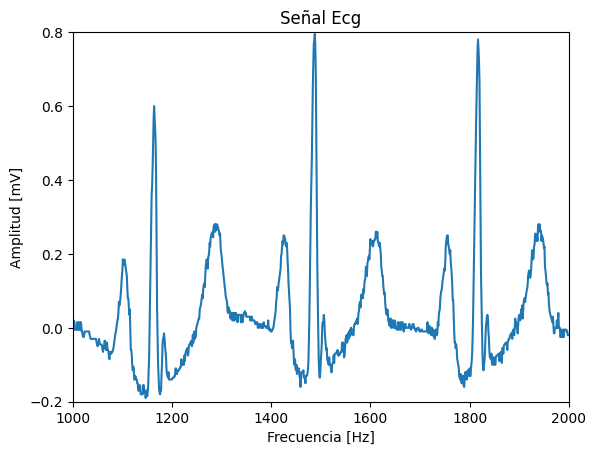

{'fs': 500,
 'sig_len': 5000,
 'n_sig': 1,
 'base_date': datetime.date(2180, 7, 23),
 'base_time': datetime.time(8, 44),
 'units': ['mV'],
 'sig_name': ['II'],
 'comments': ['<subject_id>: 10000032']}

In [ ]:
signals, fields = wfdb.rdsamp('/content/drive/Shareddrives/Labs procesamiento de señales/lab 1/40689238', channels=[1])

plt.plot(signals)
plt.axis([1000, 2000, -0.2, 0.8])
plt.title('Señal Ecg')
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Amplitud [mV]")
plt.show()
fields

#2.1 Grafica de señal en dominio del tiempo

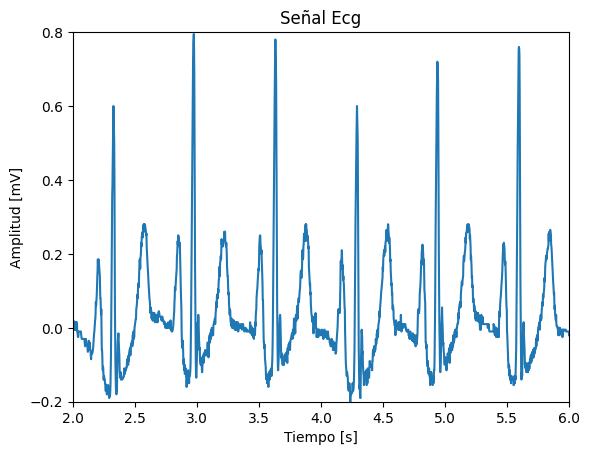

In [ ]:
fs = fields['fs']
N = fields['sig_len']
t = [n* (1/fs) for n in range(N)]
plt.plot(t, signals)
plt.title('Señal Ecg')
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [mV]")
plt.axis([2, 6, -0.2, 0.8])
plt.show()

#3.Cálculos Estadísticos Descriptivos
    a) Media de la Señal

In [ ]:
suma_total = 0
for i in range(len(signals)):
    suma_total += signals[i][0]  # signals[i][0] porque es un array 2D con una columna
numero_muestras = len(signals)
#Calcular la media (suma total / número de muestras)
media = suma_total / numero_muestras
umero_muestras = len(signals)
#Calcular la media (suma total / número de muestras)
media = suma_total / numero_muestras
print("\n--- RESULTADOS DEL CÁLCULO DE LA MEDIA ---")
print(f"Suma total de todos los valores: {suma_total:.6f}")
print(f"Número total de muestras: {numero_muestras}")
print(f"Media de la señal: {media:.6f}")




--- RESULTADOS DEL CÁLCULO DE LA MEDIA ---
Suma total de todos los valores: 176.590000
Número total de muestras: 5000
Media de la señal: 0.035318



    Usando librerias

In [ ]:
mean_signals=np.mean(signals)
print(f"media de la señal:{mean_signals:.6f}")

media de la señal:0.035318



    b) Desviación Estandar
    

In [ ]:
import math
#Calcular las diferencias al cuadrado con respecto a la media
suma_cuadrados = 0
for i in range(len(signals)):
    # Calcular la diferencia entre cada valor y la media
    diferencia = signals[i][0] - media
    # Elevar al cuadrado la diferencia
    diferencia_cuadrado = diferencia * diferencia
    # Sumar todas las diferencias al cuadrado
    suma_cuadrados += diferencia_cuadrado

print(f"Suma de diferencias al cuadrado: {suma_cuadrados:.6f}")
#Calcular la varianza (promedio de las diferencias al cuadrado)
varianza = suma_cuadrados / numero_muestras
print(f"Varianza: {varianza:.6f}")
#Calcular la desviación estándar (raíz cuadrada de la varianza)
desviacion_estandar = math.sqrt(varianza)
print(f"Desviación estándar: {desviacion_estandar:.6f}")

Suma de diferencias al cuadrado: 110.156394
Varianza: 0.022031
Desviación estándar: 0.148429



    Usando Librerias

In [ ]:
std_signals=np.std(signals)
print(f"Desviación estandar:{std_signals:.6f}")

Desviación estandar:0.148429



    c) Coeficiente de Variación

In [ ]:
#Verificar que la media no sea cero (para evitar división por cero)
if abs(media) < 1e-10:  # Umbral muy pequeño para considerar como cero
    coeficiente_variacion = float('inf')  # Infinito si media es cero
    print("¡Advertencia: La media es cercana a cero, el coeficiente de variación no es significativo!")
else:
    #Calcular el coeficiente de variación (desviación estándar / media)
    coeficiente_variacion = desviacion_estandar / abs(media)

    #Convertir a porcentaje
    coeficiente_variacion_porcentaje = coeficiente_variacion * 100
    print(f" Coeficiente de variación: {coeficiente_variacion:.6f}")
print(f" Coeficiente de variación (%): {coeficiente_variacion_porcentaje:.2f}%")


 Coeficiente de variación: 4.202655
 Coeficiente de variación (%): 420.27%



    Usando Librerias

In [ ]:
# Método directo con funciones estadísticas
def coeficiente_variacion(data):
    """Calcula el coeficiente de variación"""
    return (np.std(data) / np.abs(np.mean(data))) * 100

cv_custom = coeficiente_variacion(signals)
print(f"Coeficiente de variación: {cv_custom:.2f}%")

Coeficiente de variación: 420.27%



    d) Histograma


1. Rango de datos: -0.200000 a 0.795000
   Rango total: 0.995000
2. Número de bins: 20
   Ancho de cada bin: 0.049750
3. Límites de los bins:
   Bin 0: -0.200000
   Bin 1: -0.150250
   Bin 2: -0.100500
   Bin 3: -0.050750
   Bin 4: -0.001000
   Bin 5: 0.048750
   Bin 6: 0.098500
   Bin 7: 0.148250
   Bin 8: 0.198000
   Bin 9: 0.247750
   Bin 10: 0.297500
   Bin 11: 0.347250
   Bin 12: 0.397000
   Bin 13: 0.446750
   Bin 14: 0.496500
   Bin 15: 0.546250
   Bin 16: 0.596000
   Bin 17: 0.645750
   Bin 18: 0.695500
   Bin 19: 0.745250
   Bin 20: 0.795000

4. Conteo por bin:
   Bin 0 [-0.200000 - -0.150250]: 107 muestras
   Bin 1 [-0.150250 - -0.100500]: 532 muestras
   Bin 2 [-0.100500 - -0.050750]: 643 muestras
   Bin 3 [-0.050750 - -0.001000]: 1108 muestras
   Bin 4 [-0.001000 - 0.048750]: 1077 muestras
   Bin 5 [0.048750 - 0.098500]: 339 muestras
   Bin 6 [0.098500 - 0.148250]: 273 muestras
   Bin 7 [0.148250 - 0.198000]: 247 muestras
   Bin 8 [0.198000 - 0.247750]: 297 muestras
   Bin

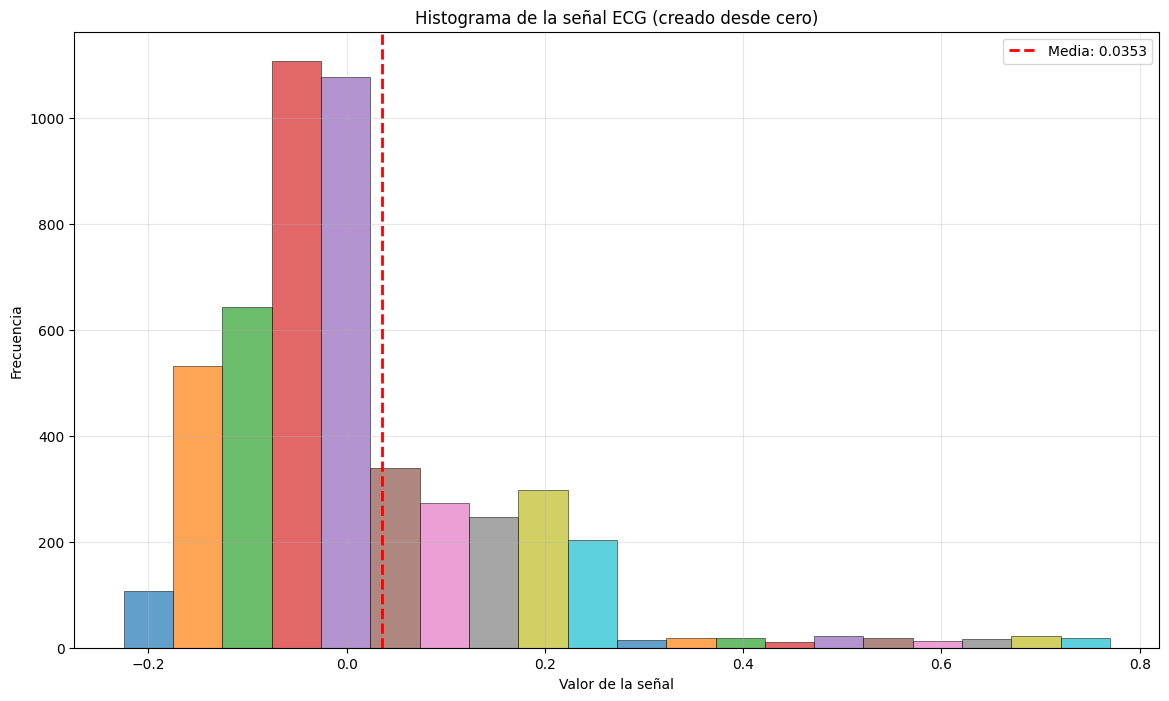


=== ESTADÍSTICAS DEL HISTOGRAMA ===
Total de muestras: 5000
Bin con mayor frecuencia: Bin 3 con 1108 muestras
Bin con menor frecuencia: Bin 13 con 11 muestras
Moda aproximada: -0.025875 (centro del bin 3)

--- DISTRIBUCIÓN DE DATOS ---
Muestras en primera mitad del rango: 4826 (96.5%)
Muestras en segunda mitad del rango: 174 (3.5%)


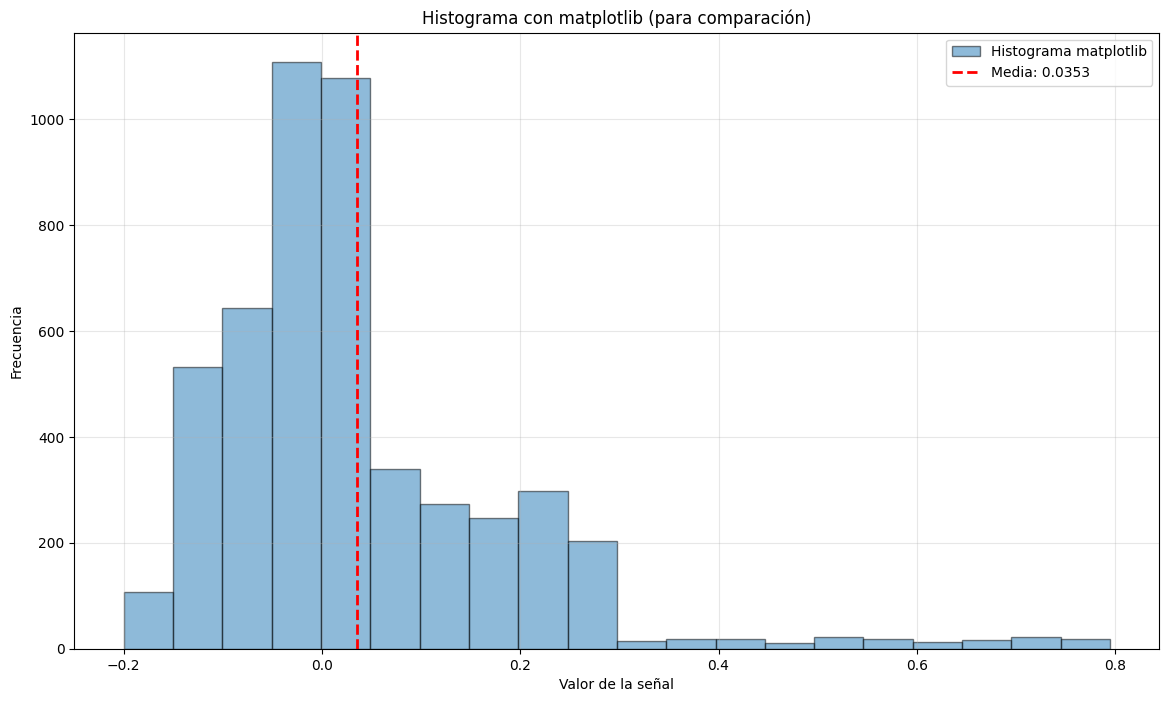


=== USANDO NUESTRA FUNCIÓN PERSONALIZADA ===
Límites de bins: ['-0.2000', '-0.1502', '-0.1005', '-0.0508', '-0.0010', '0.0488', '0.0985', '0.1482', '0.1980', '0.2478', '0.2975', '0.3473', '0.3970', '0.4468', '0.4965', '0.5463', '0.5960', '0.6458', '0.6955', '0.7452', '0.7950']
Conteos: [107, 532, 643, 1108, 1077, 339, 273, 247, 297, 203, 14, 18, 19, 11, 22, 19, 13, 17, 23, 18]


In [ ]:
# Histograma sin las librerias
numero_bins = 20  # Número de intervalos (bins)
# rango de los datos
valor_min = np.min(signals)
valor_max = np.max(signals)
rango_total = valor_max - valor_min

print(f"\n1. Rango de datos: {valor_min:.6f} a {valor_max:.6f}")
print(f"   Rango total: {rango_total:.6f}")

#ancho de cada bin
ancho_bin = rango_total / numero_bins
print(f"2. Número de bins: {numero_bins}")
print(f"   Ancho de cada bin: {ancho_bin:.6f}")
# límites de los bins
limites_bins = []
for i in range(numero_bins + 1):
    limite = valor_min + i * ancho_bin
    limites_bins.append(limite)

print(f"3. Límites de los bins:")
for i, limite in enumerate(limites_bins):
    print(f"   Bin {i}: {limite:.6f}")
#  Contar las muestras en cada bin
conteo_bins = [0] * numero_bins  # Lista de ceros para el conteo

for valor_array in signals:
    valor = valor_array[0]
    # Encontrar en qué bin cae este valor
    if valor == valor_max:
        bin_index = numero_bins - 1
    else:
        bin_index = int((valor - valor_min) / ancho_bin)
    if bin_index >= numero_bins:
        bin_index = numero_bins - 1
    if bin_index < 0:
        bin_index = 0

    conteo_bins[bin_index] += 1

print(f"\n4. Conteo por bin:")
for i, conteo in enumerate(conteo_bins):
    print(f"   Bin {i} [{limites_bins[i]:.6f} - {limites_bins[i+1]:.6f}]: {conteo} muestras")
   #  frecuencias relativas
frecuencias_relativas = []
for conteo in conteo_bins:
    frecuencia = conteo / len(signals)
    frecuencias_relativas.append(frecuencia)

print(f"\n5. Frecuencias relativas:")
for i, freq in enumerate(frecuencias_relativas):
    print(f"   Bin {i}: {freq:.4f} ({freq*100:.2f}%)")
 #  histograma manualmente
plt.figure(figsize=(14, 8))

#  barras del histograma manualmente
for i in range(numero_bins):
    # Coordenadas del rectángulo
    x = limites_bins[i]
    width = ancho_bin
    height = conteo_bins[i]
    plt.bar(x, height, width=width, alpha=0.7, edgecolor='black', linewidth=0.5)
    plt.title('Histograma de la señal ECG (creado desde cero)')
plt.xlabel('Valor de la señal')
plt.ylabel('Frecuencia')
plt.grid(True, alpha=0.3)

#  información estadística
media = np.mean(signals) # Use np.mean for the 2D array
plt.axvline(x=media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.4f}')

plt.legend()
plt.show()
#  estadísticas del histograma
print(f"\n=== ESTADÍSTICAS DEL HISTOGRAMA ===")
print(f"Total de muestras: {len(signals)}")
print(f"Bin con mayor frecuencia: Bin {conteo_bins.index(max(conteo_bins))} con {max(conteo_bins)} muestras")
print(f"Bin con menor frecuencia: Bin {conteo_bins.index(min(conteo_bins))} con {min(conteo_bins)} muestras")

#  moda
bin_moda = conteo_bins.index(max(conteo_bins))
moda_aproximada = (limites_bins[bin_moda] + limites_bins[bin_moda + 1]) / 2
print(f"Moda aproximada: {moda_aproximada:.6f} (centro del bin {bin_moda})")

# Distribución de los datos
print(f"\n--- DISTRIBUCIÓN DE DATOS ---")
conteo_primera_mitad = sum(conteo_bins[:numero_bins//2])
conteo_segunda_mitad = sum(conteo_bins[numero_bins//2:])
print(f"Muestras en primera mitad del rango: {conteo_primera_mitad} ({conteo_primera_mitad/len(signals)*100:.1f}%)")
print(f"Muestras en segunda mitad del rango: {conteo_segunda_mitad} ({conteo_segunda_mitad/len(signals)*100:.1f}%)")
# Comparación con histograma de matplotlib (para verificación)
plt.figure(figsize=(14, 8))
plt.hist(signals[:, 0], bins=numero_bins, alpha=0.5, edgecolor='black', label='Histograma matplotlib')
plt.title('Histograma con matplotlib (para comparación)')
plt.xlabel('Valor de la señal')
plt.ylabel('Frecuencia')
plt.axvline(x=media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.4f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
# Función para crear histograma personalizado
def crear_histograma_manual(datos, num_bins=20):
    """Crea un histograma desde cero sin usar funciones predefinidas"""
    min_val = np.min(datos)
    max_val = np.max(datos)
    rango = max_val - min_val
    ancho_bin = rango / num_bins

    # Crear bins
    limites = [min_val + i * ancho_bin for i in range(num_bins + 1)]
    conteos = [0] * num_bins
     # Contar datos en cada bin
    for valor in datos:
        if valor == max_val:
            idx = num_bins - 1
        else:
            idx = int((valor - min_val) / ancho_bin)
        if 0 <= idx < num_bins:
            conteos[idx] += 1

    return limites, conteos
# Usar nuestra función personalizada
limites, conteos = crear_histograma_manual(signals[:,0], 20)

print(f"\n=== USANDO NUESTRA FUNCIÓN PERSONALIZADA ===")
print("Límites de bins:", [f"{x:.4f}" for x in limites])
print("Conteos:", conteos)


    Usando librerias

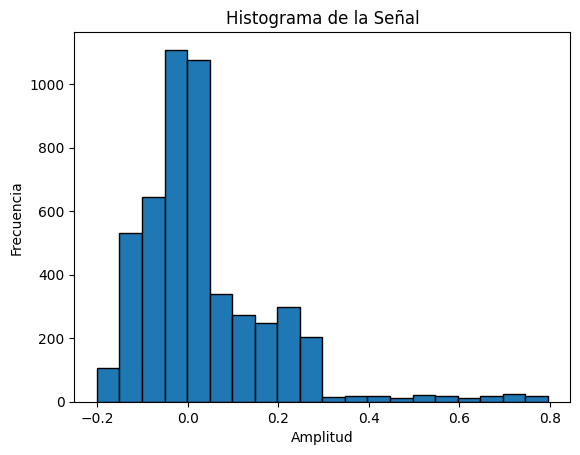

In [ ]:
plt.hist(signals, bins=20, edgecolor='black')
plt.xlabel('Amplitud')
plt.ylabel('Frecuencia')
plt.title('Histograma de la Señal')
plt.show()


    e) Función de probabilidad


1. Número de valores únicos: 175
2. Frecuencias calculadas para cada valor único
3. Probabilidades calculadas
4. Probabilidades acumuladas calculadas

=== FUNCIÓN DE PROBABILIDAD DISCRETA ===
Valor        Frecuencia   P(X=x)       F(X≤x)      
--------------------------------------------------
-0.200000    1            0.000200     0.000200    
-0.190000    3            0.000600     0.000800    
-0.185000    1            0.000200     0.001000    
-0.180000    18           0.003600     0.004600    
-0.175000    13           0.002600     0.007200    
-0.170000    19           0.003800     0.011000    
-0.165000    8            0.001600     0.012600    
-0.160000    15           0.003000     0.015600    
-0.155000    29           0.005800     0.021400    
-0.150000    47           0.009400     0.030800    
...
0.720000     7            0.001400     0.994600    
0.725000     1            0.000200     0.994800    
0.730000     2            0.000400     0.995200    
0.740000     6          

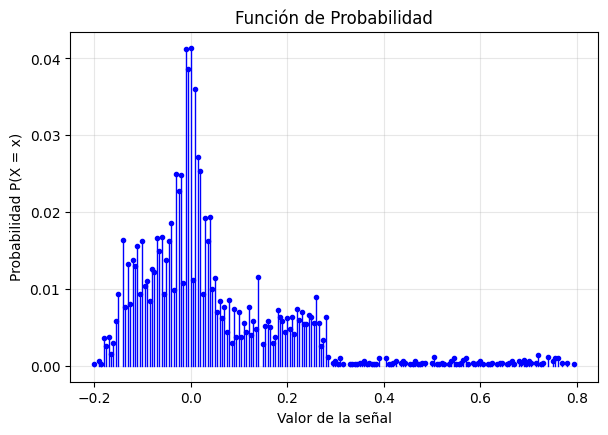

In [ ]:
#Discretizar la señal
signal_1d = signals[:, 0]
valores_unicos_ordenados = np.unique(signal_1d)
print(f"\n1. Número de valores únicos: {len(valores_unicos_ordenados)}")
#Frecuencias
frecuencias = {}
for valor in valores_unicos_ordenados:
    frecuencias[valor] = np.sum(signal_1d == valor)

print("2. Frecuencias calculadas para cada valor único")
#Función de probabilidad
probabilidades = {}
total_muestras = len(signal_1d)

for valor, frecuencia in frecuencias.items():
    probabilidades[valor] = frecuencia / total_muestras

print("3. Probabilidades calculadas")

probabilidades_acumuladas = {}
acumulado = 0

for valor in valores_unicos_ordenados:
    acumulado += probabilidades[valor]
    probabilidades_acumuladas[valor] = acumulado

print("4. Probabilidades acumuladas calculadas")
print(f"\n=== FUNCIÓN DE PROBABILIDAD DISCRETA ===")
print(f"{'Valor':<12} {'Frecuencia':<12} {'P(X=x)':<12} {'F(X≤x)':<12}")
print("-" * 50)

for i, valor in enumerate(valores_unicos_ordenados):
    if i < 10 or i >= len(valores_unicos_ordenados) - 10:
        freq = frecuencias[valor]
        prob = probabilidades[valor]
        prob_acum = probabilidades_acumuladas[valor]
        print(f"{valor:<12.6f} {freq:<12} {prob:<12.6f} {prob_acum:<12.6f}")
    elif i == 10:
        print("...")

print(f"\n=== ESTADÍSTICAS RESUMEN ===")
print(f"Suma de probabilidades: {sum(probabilidades.values()):.6f} (debe ser 1.0)")
print(f"Valor con mayor probabilidad: {max(probabilidades, key=probabilidades.get):.6f}")
print(f"Probabilidad máxima: {max(probabilidades.values()):.6f}")
print(f"Valor con menor probabilidad: {min(probabilidades, key=probabilidades.get):.6f}")
print(f"Probabilidad mínima: {min(probabilidades.values()):.6f}")

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
for valor, prob in probabilidades.items():
    plt.plot([valor, valor], [0, prob], 'b-', linewidth=1)
    plt.plot(valor, prob, 'bo', markersize=3)

plt.title('Función de Probabilidad')
plt.xlabel('Valor de la señal')
plt.ylabel('Probabilidad P(X = x)')
plt.grid(True, alpha=0.3)


    Usando Librerias

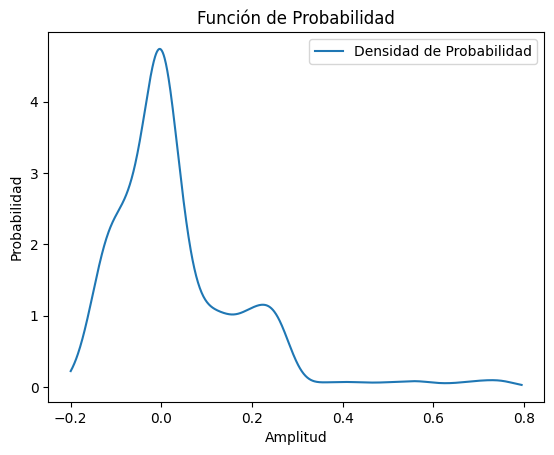

In [ ]:
from scipy.stats import gaussian_kde

densidad = gaussian_kde(signals.T)
x_vals = np.linspace(np.min(signals), np.max(signals), 1000).reshape(1, -1)
y_vals = densidad(x_vals)

plt.plot(x_vals[0], y_vals, label='Densidad de Probabilidad')
plt.xlabel('Amplitud')
plt.ylabel('Probabilidad')
plt.title('Función de Probabilidad')
plt.legend()
plt.show()


    f) Curtosis

In [ ]:
#Curtosis manualmente
curtosis = (cuarto_momento / (varianza * varianza)) - 3
print(f"Curtosis calculada: {curtosis:.6f}")
num_bins = 30
min_val = min(signal_1d)
max_val = max(signal_1d)
ancho_bin = (max_val - min_val) / num_bins

conteo_bins = [0] * num_bins
limites_bins = [min_val + i * ancho_bin for i in range(num_bins + 1)]
centros_bins = [(limites_bins[i] + limites_bins[i+1]) / 2 for i in range(num_bins)]

for valor in signal_1d:
    if valor == max_val:
        bin_idx = num_bins - 1
    else:
        bin_idx = int((valor - min_val) / ancho_bin)
    if 0 <= bin_idx < num_bins:
        conteo_bins[bin_idx] += 1

# Convertir a densidad de probabilidad
prob_bins = [count / (len(signal_1d) * ancho_bin) for count in conteo_bins]

# Histograma
plt.figure(figsize=(12, 8))
plt.bar(centros_bins, prob_bins, width=ancho_bin * 0.8,
        alpha=0.7, edgecolor='black', label='Histograma')

# Distribución normal teórica
def curva_normal(x, mu, sigma):
    """Función de densidad normal"""
    return (1 / (sigma * (2 * 3.1415926535) ** 0.5)) * (2.718281828 ** (-0.5 * ((x - mu) / sigma) ** 2))



x_normal = np.linspace(min_val, max_val, 1000)
y_normal = [curva_normal(x, media, desviacion_estandar) for x in x_normal]

# Distribución normal teórica
plt.plot(x_normal, y_normal, 'r-', linewidth=3, label='Distribución normal teórica')

# Ajuste de la curva
if curtosis > 0:
    factor_pico = 1 + abs(curtosis) / 10
    factor_colas = 1 + abs(curtosis) / 5
    y_curtosis = [curva_normal(x, media, desviacion_estandar/factor_pico) * factor_colas for x in x_normal]
    label_curtosis = f'Distribución leptocúrtica (Curtosis: {curtosis:.2f})'
    color_curtosis = 'green'
elif curtosis < 0:

    factor_plano = 1 + abs(curtosis) / 5
    factor_colas = 1 - abs(curtosis) / 10
    y_curtosis = [curva_normal(x, media, desviacion_estandar*factor_plano) * factor_colas for x in x_normal]
    label_curtosis = f'Distribución platicúrtica (Curtosis: {curtosis:.2f})'
    color_curtosis = 'blue'
else:
    y_curtosis = y_normal
    label_curtosis = f'Distribución normal (Curtosis: {curtosis:.2f})'
    color_curtosis = 'orange'

plt.plot(x_normal, y_curtosis, color=color_curtosis, linewidth=3, linestyle='--',
         label=label_curtosis)

# Líneas de referencia
plt.axvline(media, color='black', linestyle=':', linewidth=2, label=f'Media: {media:.4f}')

plt.title(f'Histograma con Curtosis\nCurtosis = {curtosis:.4f}')
plt.xlabel('Valor de la señal')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
print(f"Valor de curtosis: {curtosis:.4f}")


NameError: name 'cuarto_momento' is not defined


    Usando Librerias

In [ ]:
from scipy.stats import norm

# Graficar
plt.hist(signal_1d, bins=30, density=True, alpha=0.7)
x = np.linspace(signal_1d.min(), signal_1d.max(), 1000)
plt.plot(x, norm.pdf(x, np.mean(signal_1d), np.std(signal_1d)), 'r-')
plt.title(f'Curtosis: {curtosis:.4f}')
plt.xlabel('Valor de la señal')
plt.ylabel('Densidad de probabilidad')
plt.show()

In [ ]:
from scipy import stats
from scipy.stats import norm
# Calcular curtosis con scipy (Fisher, normal = 0)
curtosis = stats.kurtosis(signal_1d, fisher=True)
# Calcular curtosis con pandas (mismo resultado)
# curtosis = pd.Series(signal_1d).kurtosis()
print(f"Curtosis: {curtosis:.4f}")
# Crear histograma
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(signal_1d, bins=30, density=True, alpha=0.7,
                           edgecolor='black', label='Histograma')
# Calcular media y desviación estándar
media = np.mean(signal_1d)
std = np.std(signal_1d)
# Generar curva normal teórica
x = np.linspace(np.min(signal_1d), np.max(signal_1d), 1000)
y_normal = stats.norm.pdf(x, media, std)
# Graficar curva normal
plt.plot(x, y_normal, 'r-', linewidth=2, label='Distribución normal')
# Añadir línea vertical de curtosis
plt.axvline(media, color='black', linestyle='--', linewidth=1, label=f'Media: {media:.4f}')
plt.title(f'Histograma con Curtosis\nCurtosis = {curtosis:.4f}')
plt.xlabel('Valor de la señal')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Parte B

#4.  Gráfica de la Señal Capturada utilizando el Generador de Señales **Biológicas**

Para la captura de la señal ECG  generada utilizando el generador de señales biológicas, se tuvo en cuenta una frecuencia de muestreo de 1000hz lo que quiere decir que por cada segundo se toman 1000 muestras.
Es de importancia mencionar que para la adquisición de la señal, se utilizaron dos métodos, el primer método empleado hace referencia al uso de MATLAB en donde se capturo la señal, obteniendo la gráfica de la respectiva señal y un documento en excel en formato csv con los respectivos datos referentes a la señal, y el segundo método hace referencia al uso de librerias en python para adquirir la señal por medio del daq.

A continuación se muestra el código utilizado para obtener la gráfica de la señal adquirida, utilizando el documento en formato csv que se obtuvo por medio de la captura de la señal en MATLAB.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.fftpack import fft
import scipy.stats as stats
# Cargar la señal EMG desde un archivo CSV
file_path = "/content/drive/MyDrive/Colab Notebooks/emg_signal.csv"  # Asegúrate de que el archivo esté en el mismo directorio
df = pd.read_csv(file_path)

# Extraer datos
tiempo = df.iloc[:, 0]  # Primera columna (Tiempo)
voltaje = df.iloc[:, 1]  # Segunda columna (Voltaje)
# Graficar la señal original
plt.figure(figsize=(10, 4))
plt.plot(tiempo, voltaje, label="Señal EMG", color="b")
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje (V)")
plt.title("Señal EMG Original")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:



graficacaptura = pd.read_csv("/content/drive/Shareddrives/Labs procesamiento de señales/lab 1/datos_ecg.csv")

# Graficar la señal
plt.plot(graficacaptura, label="Señal ECG")
plt.xlabel("(1000muestras/seg)")
plt.ylabel("Amplitud (V)")
plt.title("Señal ECG Capturada")
plt.legend()
plt.show()

In [ ]:
mean_graficacaptura=np.mean(graficacaptura)
print(f"media de la señal:{mean_graficacaptura:.6f}")

mean_signals=np.mean(signals)
print(f"media de la señal:{mean_signals:.6f}")

In [ ]:
valores = graficacaptura.iloc[:,0].to_numpy()

desviacion_graficacaptura = np.std(valores)

print(f"Desviación estándar: {desviacion_graficacaptura:.6f}")


In [ ]:
cv = graficacaptura.std(ddof=1).iloc[0] / graficacaptura.mean().iloc[0]
print(f"Coeficiente de variación: {cv:.6f} ({cv*100:.2f} %)")

In [ ]:
plt.hist(graficacaptura, bins=20, edgecolor='black')
plt.xlabel('Amplitud(V)')
plt.ylabel('Frecuencia(Hz)')
plt.title('Histograma de la Señal')
plt.show()

In [ ]:
densidad = gaussian_kde(graficacaptura.T)
x_valscap = np.linspace(np.min(graficacaptura), np.max(graficacaptura), 1000).reshape(1, -1)
y_valscap = densidad(x_valscap)

plt.plot(x_valscap[0], y_valscap, label='Densidad de Probabilidad')
plt.xlabel('Amplitud(V)')
plt.ylabel('Probabilidad')
plt.title('Función de Probabilidad')
plt.legend()
plt.show()

In [ ]:
curt = stats.kurtosis(graficacaptura.iloc[:,0], fisher=True)
print(f"Curtosis: {curt:.6f}")

In [ ]:
valoresfin = graficacaptura.iloc[:,0].dropna()
media = valoresfin.mean()
desv = valoresfin.std(ddof=1)
curt = stats.kurtosis(valoresfin, fisher=True)

plt.hist(valoresfin, bins=20, density=True, color="steelblue", edgecolor="black", alpha=0.7, label="Histograma")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 200)
p = stats.norm.pdf(x, media, desv)

plt.plot(x, p, "r", linewidth=2, label="Distribución normal")
plt.axvline(media, color="black", linestyle="--", linewidth=1.5, label=f"Media: {media:.4f}")
plt.title(f"Histograma con Curtosis\nCurtosis = {curt:.4f}")
plt.xlabel("Valor de la señal")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.show()


#5. Cálculos Estadísticos Descriptivos

#6. Comparación de Resultados Obtenidos en la Parte A y Parte B

# Parte C

#7. ¿ Qué es la Relación Señal Ruido (SNR)?
Se define como la razón entre la energía de una señal y la energía de ruido expresada en decibeles
(dB), y brinda información sobre el nivel de ruido de fondo presente en una señal de habla u otra.

a)**Ruido Gaussiano:**

Es un tipo de señal aleatoria que tiene una función de densidad de probabilidad (PDF) igual a la de la distribución normal. En términos más simples, es un tipo de ruido que se caracteriza por su aleatoriedad e imprevisibilidad.

Una de las características clave del ruido gaussiano es que tiene una media de cero y una varianza constante. Esto significa que el ruido se distribuye uniformemente alrededor de cero, sin sesgo hacia valores positivos o negativos. Esto hace que el ruido gaussiano sea un modelo ideal para muchos fenómenos naturales, ya que refleja con precisión la variabilidad y la aleatoriedad presentes en los datos del mundo real.

En el campo del procesamiento de señales, el ruido gaussiano se utiliza a menudo como modelo de las fluctuaciones aleatorias que pueden producirse en las señales electrónicas. Al añadir ruido gaussiano a una señal, los investigadores pueden simular los efectos del ruido en el rendimiento de un sistema y desarrollar estrategias para mitigar su impacto.

Contaminación la señal con ruido gaussiano y medición del SNR

b) **Ruido Impulso:**

Un ruido de impulso es definido como un único ruido transitorio (o una serie de ellos)
de extremadamente corta duración en el cual el nivel de presión sonora asciende
rápidamente hasta un nivel pico de presión sonora, y a partir de allí desciende
exponencialmente hasta el ruido ambiental.
El ruido de impulso surge principalmente como resultado de una repentina liberación
de energía en el medio, energía eléctrica en el caso de la ionización del aire, como en
cortocircuitos, o energía química por la liberación súbita de gases, como en una descarga
explosiva de un arma de fuego.


Contaminación la señal con ruido impulso y medición del SNR.

c)**Ruido Tipo Artefacto**


 Contaminación la señal con ruido tipo artefacto y medición del SNR

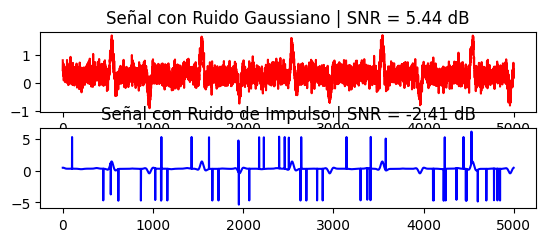

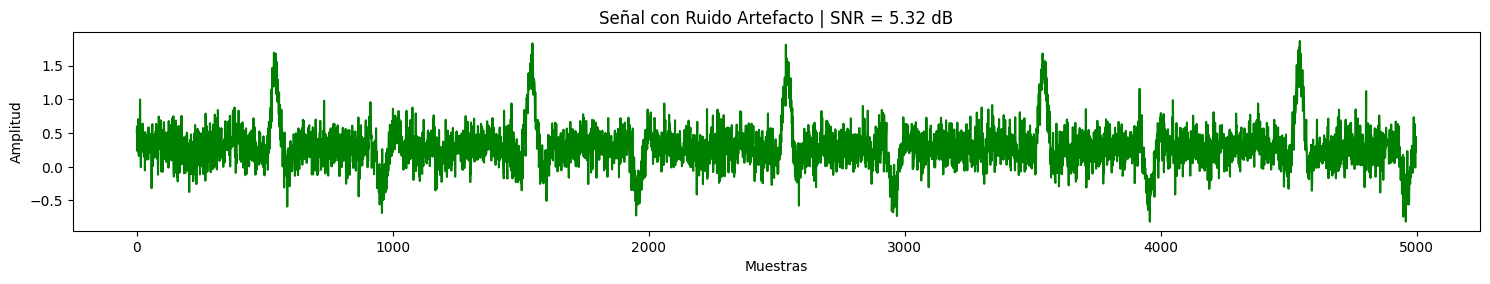

In [ ]:
data = pd.read_csv("/content/drive/Shareddrives/Labs procesamiento de señales/lab 1/datos_ecg.csv")
senal = data.iloc[:,0].values
fs = 200

def calcular_snr(senal_original, senal_ruidosa):
    potencia_senal = np.mean(senal_original**2)
    potencia_ruido = np.mean((senal_ruidosa - senal_original)**2)
    snr = 10 * np.log10(potencia_senal / potencia_ruido)
    return snr

    # a) Ruido Gaussiano
ruido_gauss = np.random.normal(0, 0.2, len(senal))
senal_gauss = senal + ruido_gauss
snr_gauss = calcular_snr(senal, senal_gauss)
plt.subplot(4,1,1)
plt.plot(senal_gauss, color="red")
plt.title(f"Señal con Ruido Gaussiano | SNR = {snr_gauss:.2f} dB")

# b) Ruido de Impulso
ruido_impulso = np.zeros(len(senal))
num_impulsos = int(0.01 * len(senal))
posiciones = np.random.randint(0, len(senal), num_impulsos)
ruido_impulso[posiciones] = np.random.choice([5, -5], num_impulsos)
senal_impulso = senal + ruido_impulso
snr_impulso = calcular_snr(senal, senal_impulso)

plt.subplot(4,1,2)
plt.plot(senal_impulso, color="blue")
plt.title(f"Señal con Ruido de Impulso | SNR = {snr_impulso:.2f} dB")

# c) Ruido Tipo Artefacto
ruido_artefacto = np.random.normal(0, 0.2, len(senal))
senal_artefacto = senal + ruido_artefacto
snr_artefacto = calcular_snr(senal, senal_artefacto)
plt.figure(figsize=(15,10))

plt.subplot(4,1,3)
plt.plot(senal_artefacto, color="green")
plt.title(f"Señal con Ruido Artefacto | SNR = {snr_artefacto:.2f} dB")

plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.tight_layout()
plt.show()

#8. Análisis de Resultados

#9. Conclusiones

#10. Referencias